In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv("../data/banking.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
df.shape

(41188, 21)

In [5]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [6]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [7]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [8]:
df.loc[(df.education == "basic.4y") |
      (df.education == "basic.6y") |
      (df.education == "basic.9y"), "education" ] =  'basic'

In [9]:
df.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [10]:
df.education.value_counts()["unknown"] / df.shape[0] * 100

4.202680392347285

In [11]:
import seaborn as sns

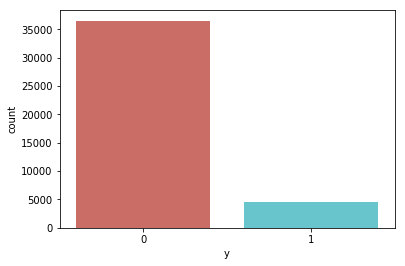

In [12]:
sns.countplot(x="y", data=df, palette='hls')

In [13]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [14]:
df.loc[df.y == 1].shape[0] / df.shape[0] * 100

11.265417111780131

In [15]:
df.loc[df.y == 0].shape[0] / df.shape[0] * 100

88.73458288821988

In [16]:
df.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [17]:
df.groupby("y").agg("mean")

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [18]:
df.loc[df.pdays == 999].shape[0] / df.shape[0] * 100

96.32174419733903

In [19]:
df.groupby("job").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


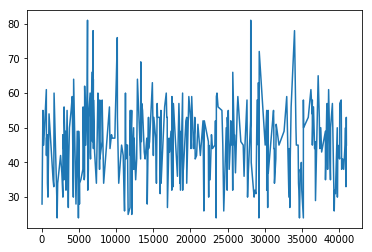

In [20]:
df.loc[df.job == "unknown", "age"].plot()

In [21]:
import matplotlib.pyplot as plt

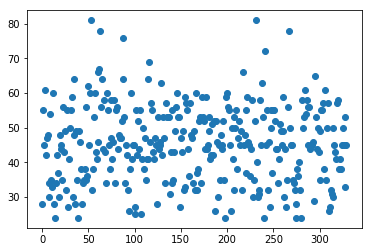

In [22]:
plt.scatter(np.arange(df.loc[df.job == "unknown", "age"].shape[0]),
    df.loc[df.job == "unknown", "age"])

In [23]:
df.groupby("marital").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [24]:
pd.crosstab(df.job, df.y)

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [25]:
df.groupby(["y", "job"]).count()

age  marital  education  default  housing  loan  contact  \
y job                                                                        
0 admin.         9070     9070       9070     9070     9070  9070     9070   
  blue-collar    8616     8616       8616     8616     8616  8616     8616   
  entrepreneur   1332     1332       1332     1332     1332  1332     1332   
  housemaid       954      954        954      954      954   954      954   
  management     2596     2596       2596     2596     2596  2596     2596   
  retired        1286     1286       1286     1286     1286  1286     1286   
  self-employed  1272     1272       1272     1272     1272  1272     1272   
  services       3646     3646       3646     3646     3646  3646     3646   
  student         600      600        600      600      600   600      600   
  technician     6013     6013       6013     6013     6013  6013     6013   
  unemployed      870      870        870      870      870   870      870   
  unknown         293      293        293      293      293   293      293   
1 admin.         1352     1352       1352     1352     1352  1352     1352   
  blue-collar     638      638        638      638      638   638      638   
  entrepreneur    124      124        124      124      124   124      124   
  housemaid       106      106        106      106      106   106      106   
  management      328      328        328      328      328   328      328   
  retired         434      434        434      434      434   434      434   
  self-employed   149      149        149      149      149   149      149   
  services        323      323        323      323      323   323      323   
  student         275      275        275      275      275   275      275   
  technician      730      730        730      730      730   730      730   
  unemployed      144      144        144      144      144   144      144   
  unknown          37       37         37       37       37    37       37   

                 month  day_of_week  duration  campaign  pdays  previous  \
y job                                                                      
0 admin.          9070         9070      9070      9070   9070      9070   
  blue-collar     8616         8616      8616      8616   8616      8616   
  entrepreneur    1332         1332      1332      1332   1332      1332   
  housemaid        954          954       954       954    954       954   
  management      2596         2596      2596      2596   2596      2596   
  retired         1286         1286      1286      1286   1286      1286   
  self-employed   1272         1272      1272      1272   1272      1272   
  services        3646         3646      3646      3646   3646      3646   
  student          600          600       600       600    600       600   
  technician      6013         6013      6013      6013   6013      6013   
  unemployed       870          870       870       870    870       870   
  unknown          293          293       293       293    293       293   
1 admin.          1352         1352      1352      1352   1352      1352   
  blue-collar      638          638       638       638    638       638   
  entrepreneur     124          124       124       124    124       124   
  housemaid        106          106       106       106    106       106   
  management       328          328       328       328    328       328   
  retired          434          434       434       434    434       434   
  self-employed    149          149       149       149    149       149   
  services         323          323       323       323    323       323   
  student          275          275       275       275    275       275   
  technician       730          730       730       730    730       730   
  unemployed       144          144       144       144    144       144   
  unknown           37           37        37        37     37        37   

            

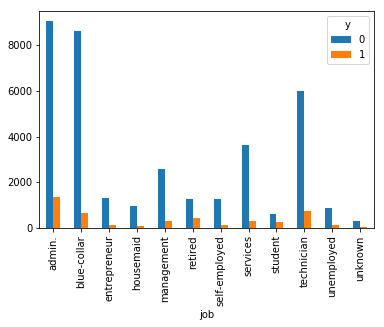

In [26]:
pd.crosstab(df.job, df.y).plot.bar()

In [27]:
job_y = pd.crosstab(df.job, df.y)

In [28]:
job_y.head()

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328


In [29]:
job_y.columns

Int64Index([0, 1], dtype='int64', name='y')

In [30]:
job_y["ratio"] = job_y[1] / (job_y[0] + job_y[1])

In [31]:
job_y.head()

y,0,1,ratio
job,,,
admin.,9070,1352,0.129726
blue-collar,8616,638,0.068943
entrepreneur,1332,124,0.085165
housemaid,954,106,0.100000
management,2596,328,0.112175


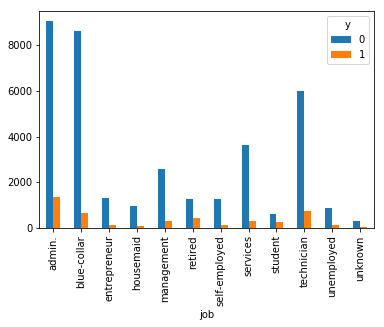

In [32]:
pd.crosstab(df.job, df.y).plot.bar()

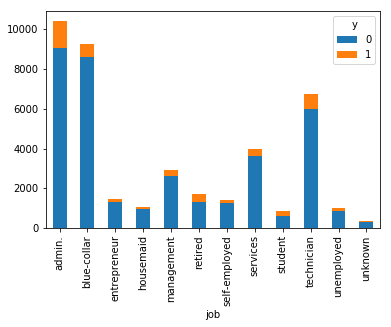

In [33]:
pd.crosstab(df.job, df.y).plot.bar(stacked=True)

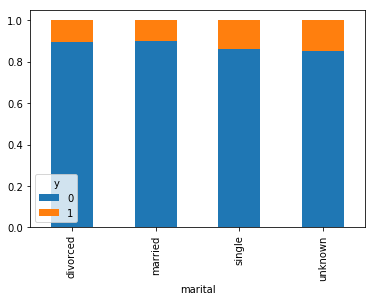

In [34]:
marital_y = pd.crosstab(df.marital, df.y)
marital_y.div(marital_y.sum(1).astype(float), axis=0).plot.bar(stacked=True)

In [35]:
marital_y

y,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [36]:
marital_y.sum(1)

marital
divorced     4612
married     24928
single      11568
unknown        80
dtype: int64

In [37]:
marital_y.div(marital_y.sum(1).astype(float), axis=0)

y,0,1
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000


In [38]:
pd.crosstab(df.day_of_week, df.y)

y,0,1
day_of_week,,
fri,6981,846
mon,7667,847
thu,7578,1045
tue,7137,953
wed,7185,949


In [39]:
day_of_week_y = pd.crosstab(df.day_of_week, df.y)

In [40]:
day_of_week_y

y,0,1
day_of_week,,
fri,6981,846
mon,7667,847
thu,7578,1045
tue,7137,953
wed,7185,949


In [41]:
day_of_week_y.sum(1)

day_of_week
fri    7827
mon    8514
thu    8623
tue    8090
wed    8134
dtype: int64

In [42]:
day_of_week_y.div(day_of_week_y.sum(1), axis=0)

y,0,1
day_of_week,,
fri,0.891913,0.108087
mon,0.900517,0.099483
thu,0.878812,0.121188
tue,0.882200,0.117800
wed,0.883329,0.116671


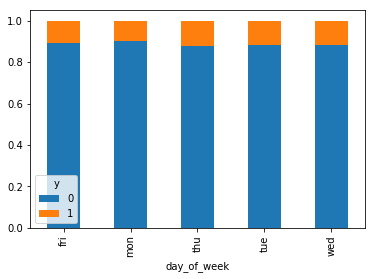

In [43]:
day_of_week_y.div(day_of_week_y.sum(1), axis=0).plot.bar(stacked=True)

(array([1.6660e+03, 1.1343e+04, 1.2037e+04, 8.0870e+03, 5.8230e+03,
        1.6130e+03, 3.1800e+02, 2.0200e+02, 8.9000e+01, 1.0000e+01]),
 array([17. , 25.1, 33.2, 41.3, 49.4, 57.5, 65.6, 73.7, 81.8, 89.9, 98. ]),
 <a list of 10 Patch objects>)

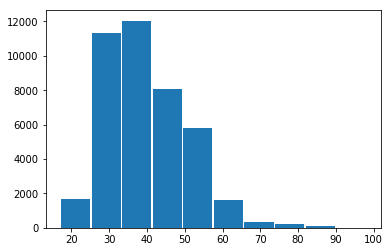

In [44]:
plt.hist(df.age, rwidth=0.95)

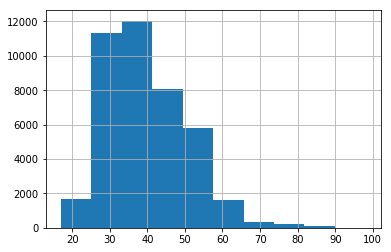

In [45]:
df.age.hist()

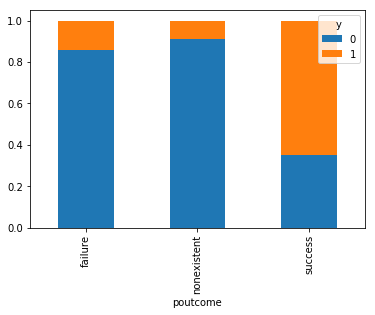

In [46]:
pd.crosstab(df.poutcome, df.y).div(pd.crosstab(df.poutcome, df.y).sum(1),axis=0).plot.bar(stacked=True)

In [47]:
cat_col = ["job", "marital", "education", "default", "housing", "loan", 
           "contact", "month", "day_of_week", "poutcome"]

In [48]:
for var in cat_col:
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1 = df.join(cat_list)
    df = df1

In [49]:
pd.get_dummies(df.poutcome, prefix="poutcome")

,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
5,0,1,0
6,0,1,0
7,0,1,0
8,0,0,1
9,1,0,0


In [50]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [53]:
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [57]:
df_col = df.columns.tolist()

In [62]:
to_keep = [i for i in df_col 
           if i not in cat_col]

In [64]:
df_new = df.loc[:, to_keep]

In [67]:
df_new.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
      

### SMOTE

### Synthetic Minority Oversampling Technique

In [52]:
#! pip install imbalanced-learn

In [68]:
X = df_new.loc[:, df_new.columns != "y"]
y = df_new.loc[:, df_new.columns == "y"]

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
os = SMOTE(random_state=42)

In [71]:
os_data_X, os_data_y = os.fit_sample(X, y)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
type(os_data_X)

numpy.ndarray

In [74]:
df_x = pd.DataFrame(os_data_X, columns=X.columns)
df_y = pd.DataFrame(os_data_y, columns=y.columns)

In [75]:
df_x.shape

(73096, 61)

In [76]:
df_y.shape

(73096, 1)

In [77]:
df.shape

(41188, 72)

In [80]:
df_y.y.value_counts()

1    36548
0    36548
Name: y, dtype: int64

In [81]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

### Logistic Regression

In [82]:
import statsmodels.api as sm

In [84]:
lr = sm.Logit(df_y,df_x)

In [86]:
result = lr.fit()

         Current function value: 0.317513
         Iterations: 35


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [88]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                73096
Model:                          Logit   Df Residuals:                    73045
Method:                           MLE   Df Model:                           50
Date:                Sun, 23 Sep 2018   Pseudo R-squ.:                  0.5419
Time:                        10:03:31   Log-Likelihood:                -23209.
converged:                      False   LL-Null:                       -50666.
                                        LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                              -0.0013      0.001     -0.869      0.385      -0.004       0.002
duration                          0.0071   6.15e-05    115.860      0.000 

In [87]:
print(result.summary2())

                                            Results: Logit
Model:                            Logit                        Pseudo R-squared:             0.542     
Dependent Variable:               y                            AIC:                          46519.8213
Date:                             2018-09-23 10:02             BIC:                          46988.9972
No. Observations:                 73096                        Log-Likelihood:               -23209.   
Df Model:                         50                           LL-Null:                      -50666.   
Df Residuals:                     73045                        LLR p-value:                  0.0000    
Converged:                        0.0000                       Scale:                        1.0000    
No. Iterations:                   35.0000                                                              
-------------------------------------------------------------------------------------------------------
     

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [94]:
p_cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 
        'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 
        'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", 
        "poutcome_success"] 

###  Sklearn

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [97]:
lr = LogisticRegression()

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, 
                test_size=0.3, random_state=42)

In [103]:
lr.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
y_pred = lr.predict(X_test)

In [129]:
y_pred_prob = lr.predict_proba(X_test)

In [130]:
list(zip(y_pred, y_pred_prob))[:5]

[(1, array([0.0722463, 0.9277537])),
 (0, array([0.97628543, 0.02371457])),
 (1, array([0.0030645, 0.9969355])),
 (1, array([0.05416921, 0.94583079])),
 (0, array([0.61026942, 0.38973058]))]

In [133]:
y_pred_prob[12]

array([0.25440347, 0.74559653])

In [134]:
y_pred[12]

1

In [107]:
lr.score(X_test, y_test)

0.878015413379543

In [111]:
y_test.shape, y_pred.shape

((21929, 1), (21929,))

In [113]:
(y_test == y_pred.reshape(y_pred.shape[0], 1)).mean()

y    0.878015
dtype: float64

In [114]:
metrics.confusion_matrix(y_test, y_pred)

array([[9408, 1558],
       [1117, 9846]], dtype=int64)

In [116]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.86      0.88     10966
          1       0.86      0.90      0.88     10963

avg / total       0.88      0.88      0.88     21929



In [118]:
from sklearn.metrics import roc_auc_score, roc_curve

In [119]:
logit_roc = roc_auc_score(y_test, y_pred)

In [120]:
logit_roc

0.8780181622967405

In [121]:
fpr, tpr, threshold = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])

In [123]:
import matplotlib.pyplot as plt

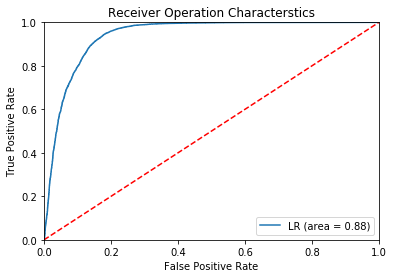

In [127]:
plt.figure()
plt.plot(fpr, tpr, label="LR (area = %0.2f)"% logit_roc)

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operation Characterstics")
plt.legend(loc="lower right")
plt.show()